<a href="https://colab.research.google.com/github/amthreeh/object-detection/blob/main/1111_yolov7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://fastcampus.co.kr/media_data_yolo
- https://bong-sik.tistory.com/27
- https://machinelearningprojects.net/train-yolov7-on-the-custom-dataset/

# 데이터 수집

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 학습

In [2]:
import sys
import torch

In [14]:
!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 1127, done.
remote: Total 1127 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1127/1127), 69.94 MiB | 21.64 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [16]:
%cd /content/yolov7

/content/yolov7


In [17]:
pwd

'/content/yolov7'

In [18]:
!pip install -r /content/yolov7/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.2 MB/s eta 0:00:00


In [19]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QlP6upcAb7CA1vS8XSdi")
project = rf.workspace("jina-kim-wn9ky").project("recycle-tdliv")
dataset = project.version(4).download("yolov7")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to recycle-4 in yolov7pytorch:: 100%|██████████| 94/94 [00:00<00:00, 2463.58it/s]


In [20]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('./recycle-4/train/images/*.jpg') + glob('./recycle-4/train/images/*.jpeg')
valid_img_list = glob('./recycle-4/valid/images/*.jpg') + glob('./recycle-4/valid/images/*.jpeg')


# txt 파일에 write
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

In [21]:
!python train.py --workers 1  --device 0 --batch-size 16 --epochs 29 --data recycle-4/data.yaml --img 640 640 --cfg cfg/training/yolov7.yaml --weights yolov7.pt --name yolov7 --hyp data/hyp.scratch.p5.yaml

YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='recycle-4/data.yaml', device='0', entity=None, epochs=29, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov7', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=1, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, w

In [23]:
!python detect.py --weights /content/yolov7/recycle-4/test/images/23_jpeg.rf.88896315b10eb009b416de81bf9e3f17.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='inference/images', update=False, view_img=False, weights=['/content/yolov7/recycle-4/test/images/23_jpeg.rf.88896315b10eb009b416de81bf9e3f17.jpg'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Traceback (most recent call last):
  File "detect.py", line 196, in <module>
    detect()
  File "detect.py", line 34, in detect
    model = attempt_load(weights, map_location=device)  # load FP32 model
  File "/content/yolov7/models/experimental.py", line 252, in attempt_load
    ckpt = torch.load(w, map_location=map_location)  # load
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 795, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/usr/local/lib

# 예측

### 시각화

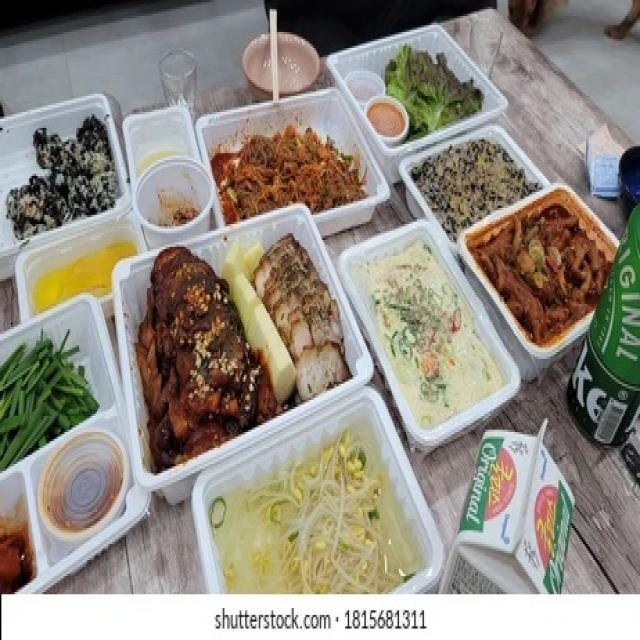

In [24]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov7/recycle-4/test/images/23_jpeg.rf.88896315b10eb009b416de81bf9e3f17.jpg')
cv2_imshow(img)